In [1]:
# Logistinė regresija demo
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# # Sugeneruojami duomenys
# np.random.seed(0)
# mokesi_valandu = np.random.normal(25, 5, 100)
# islaike_egzamina = (mokesi_valandu + np.random.normal(0, 2, 100)) > 25

In [3]:
# Sukuriamas DataFrame
# data = pd.DataFrame({'Mokėsi valandų': mokesi_valandu, 'Išlaikė egzaminą': islaike_egzamina.astype(int)})
data=pd.read_csv("data/logist1.csv")
data

,Unnamed: 0,Mokėsi valandų,Išlaikė egzaminą
0,0,33.820262,1
1,1,27.000786,0
2,2,29.893690,1
3,3,36.204466,1
4,4,34.337790,1
...,...,...,...
95,95,28.532866,1
96,96,25.052500,1
97,97,33.929352,1
98,98,25.634560,1


In [4]:
# Duomenų padalinimas į mokymo ir testavimo rinkinius
X=data[['Mokėsi valandų']]
y=data['Išlaikė egzaminą']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [5]:
X_train

,Mokėsi valandų
43,34.753877
62,20.934269
3,36.204466
71,25.644915
45,22.809628
...,...
96,25.052500
67,27.313911
64,25.887131
47,28.887452


In [7]:
from sklearn.linear_model import LogisticRegression

# Sukuriamas modelis
model = LogisticRegression()

# Modelio apmokymas
model.fit(X_train, y_train)


LogisticRegression()

In [8]:
# Prognozavimas testavimo duomenims
predictions = model.predict(X_test)



In [9]:
predictions

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0],
      dtype=int64)

In [10]:
from sklearn.metrics import accuracy_score
# Tikslumo įvertinimas
accuracy = accuracy_score(y_test, predictions)
print(f'Modelio tikslumas: {accuracy:.2f}')


Modelio tikslumas: 0.85


In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

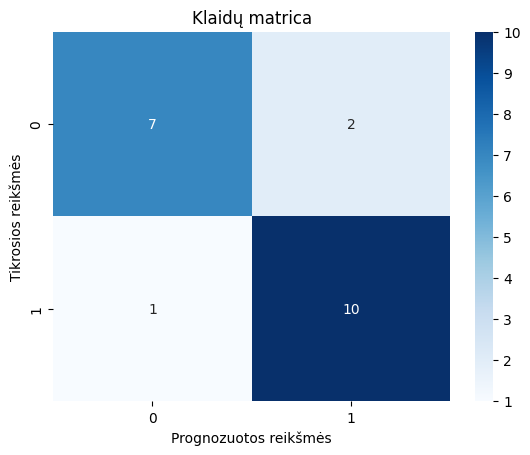

Modelio tikslumas: 0.85


In [12]:
conf_matrix = confusion_matrix(y_test, predictions)

# Grafiškai pavaizduojama klaidų matrica
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prognozuotos reikšmės')
plt.ylabel('Tikrosios reikšmės')
plt.title('Klaidų matrica')
plt.show()
print(f'Modelio tikslumas: {accuracy:.2f}')

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [15]:
# Apskaičiuojami vertinimai
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Atspausdinami vertinimai
print(f'Modelio tikslumas (Accuracy): {accuracy:.2f}')
print(f'Modelio precizija (Precision): {precision:.2f}')
print(f'Modelio atitikimas (Recall): {recall:.2f}')
print(f'Modelio F1 įvertis: {f1:.2f}')

Modelio tikslumas (Accuracy): 0.85
Modelio precizija (Precision): 0.83
Modelio atitikimas (Recall): 0.91
Modelio F1 įvertis: 0.87
